In [4]:
import networkx as nx
from node2vec import Node2Vec
import numpy as np
import matplotlib.pyplot as plt

In [35]:
def randomly_remove_links(G, n_missing):
    
    my_edges = np.array(list(G.edges))
    number_of_rows = my_edges.shape[0]
    rnd_idx = np.random.choice(number_of_rows,
                               size = n_missing,
                               replace = False)

    pair = my_edges[rnd_idx, :]
    
    for p in pair:
        G.remove_edge(p[0], p[1])
        
    return pair

def get_representation(G, params):
    
    dimensions, walk_length, num_walks, workers,\
    window, min_count, batch_words = params
    
    n2v = Node2Vec(G,
                   dimensions = dimensions,
                   walk_length = walk_length,
                   num_walks = num_walks,
                   workers = workers,
                   quiet = True,
                   )
    
    embedding = n2v.fit(window = window,
                        min_count = min_count,
                        batch_words = batch_words,
                        )
    

    representation = [] 
    n_node = G.number_of_nodes()
    
    for i in range(n_node):
        representation.append(embedding.wv['%d'%i])
    
    representation = np.array(representation)
    
    return representation

def calc_cosine_similarity(vec1, vec2):
    
#     n = len(vec1)
#     cos_sim = 0.
    
#     for i in range(n):
    cosim = np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))
    
#     cos_sim /= n
    
    return cosim

def calc_euclidean_distance(vec1, vec2):

    
    euc_dist = np.linalg.norm(np.array(vec1) - np.array(vec2))
    return euc_dist


def dist(vi, vj):
    d = 0
    for i in range(len(vi)):
        d += (vi[i] - vj[i])**2
    return np.sqrt(d)

In [38]:
'''
File IO
'''
DATA_PATH = '/home/mk139/WorkSpace/proj_naive-embedded-reconstruction/results/MK_exp/data/exp3/'
FIG_PATH = '/home/mk139/WorkSpace/proj_naive-embedded-reconstruction/results/MK_exp/figs/'

'''
Parameters
'''
n_node = 100 # size of ring lattice
n_missing = 1 # numberD of missing edges

dimensions = 100 # euclidean dimension to embedd
walk_length = 30 # number of nodes in each walk
num_walks = 100 # number of walks per node
workers = 10 # for cpu parallel work

window = 10 # Maximum distance between the current and predicted word within a sentence.
min_count = 1 #ignores all words with total frequency lower than this
batch_words = 4

repeat = 100

'''
Build network
'''

ring_lattice = nx.cycle_graph(n_node)
ring_missing = nx.cycle_graph(n_node)
removed_pairs = randomly_remove_links(ring_missing, n_missing)
print(f'removed_pairs:{removed_pairs}')


'''
Get vector representation
'''
list_length = [2, 5, 10, 25, 50, 75, 100]






for walk_length in list_length:
    
    list_dist_control = []
    list_cosim_control = []
    list_dist_exp = []
    list_cosim_exp = []
    
    print(f'length: {walk_length}')
    param = [dimensions, walk_length, num_walks, workers,
        window, min_count, batch_words]

    for i in range(repeat):
        
        if (i+1) % 10 == 0:
            print(f'{i}-th iteration')
        
        rep_ring = get_representation(ring_lattice, param)
        rep_ring_exp = get_representation(ring_missing, param)

        '''
        Calcualte euclidean distance
        '''

        node1 = removed_pairs[0][0]
        node2 = removed_pairs[0][1]
        dist_control = calc_euclidean_distance(rep_ring[node1],
                                               rep_ring[node2])
        cosim_control = calc_cosine_similarity(rep_ring[node1],
                                               rep_ring[node2])

        dist_exp = calc_euclidean_distance(rep_ring_exp[node1],
                                           rep_ring_exp[node2])
        cosim_exp = calc_cosine_similarity(rep_ring_exp[node1],
                                           rep_ring_exp[node2])

        
        list_dist_control.append(dist_control)
        list_cosim_control.append(cosim_control)
        list_dist_exp.append(dist_exp)
        list_cosim_exp.append(cosim_exp)
        
        
    # save data plz
    with open(DATA_PATH + f'distance_control_N{n_node}_M{n_missing}_D{dimensions}_L{walk_length}.dat', 'a') as f:
        for x in list_dist_control:
            f.write("%f\n"%x)
    
    with open(DATA_PATH + f'distance_exp_N{n_node}_M{n_missing}_D{dimensions}_L{walk_length}.dat', 'a') as f:
        for x in list_dist_exp:
            f.write("%f\n"%x)
            
    with open(DATA_PATH + f'cosim_control_N{n_node}_M{n_missing}_D{dimensions}_L{walk_length}.dat', 'a') as f:
        for x in list_cosim_control:
            f.write("%f\n"%x)
            
    with open(DATA_PATH + f'cosim_exp_N{n_node}_M{n_missing}_D{dimensions}_L{walk_length}.dat', 'a') as f:
        for x in list_cosim_exp:
            f.write("%f\n"%x)




removed_pairs:[[17 18]]
length: 2
9-th iteration
19-th iteration
29-th iteration
39-th iteration
49-th iteration
59-th iteration
69-th iteration
79-th iteration
89-th iteration
99-th iteration
length: 5
9-th iteration
19-th iteration
29-th iteration
39-th iteration
49-th iteration
59-th iteration
69-th iteration
79-th iteration
89-th iteration
99-th iteration
length: 10
9-th iteration
19-th iteration
29-th iteration
39-th iteration
49-th iteration
59-th iteration
69-th iteration
79-th iteration
89-th iteration
99-th iteration
length: 25
9-th iteration
19-th iteration
29-th iteration
39-th iteration
49-th iteration
59-th iteration
69-th iteration
79-th iteration
89-th iteration
99-th iteration
length: 50
9-th iteration
19-th iteration
29-th iteration
39-th iteration
49-th iteration
59-th iteration
69-th iteration
79-th iteration
89-th iteration
99-th iteration
length: 75
9-th iteration
19-th iteration
29-th iteration
39-th iteration
49-th iteration
59-th iteration
69-th iteration
79-th 

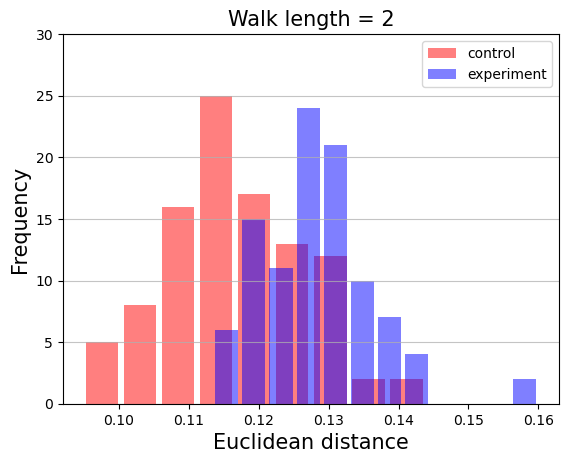

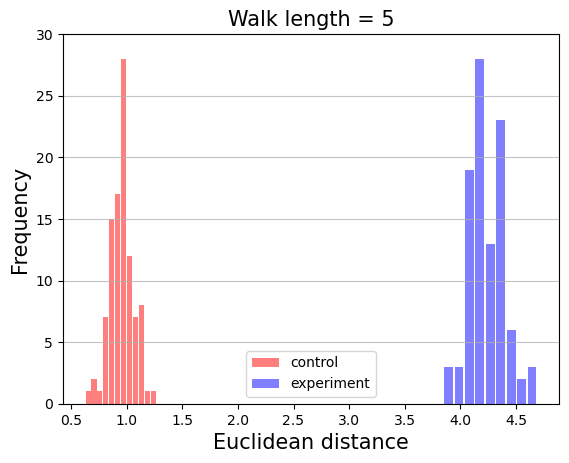

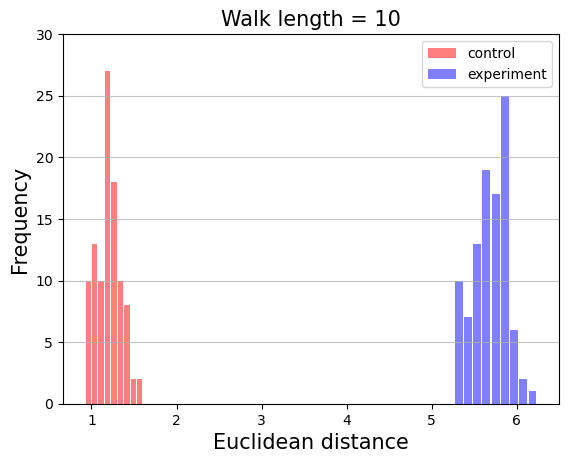

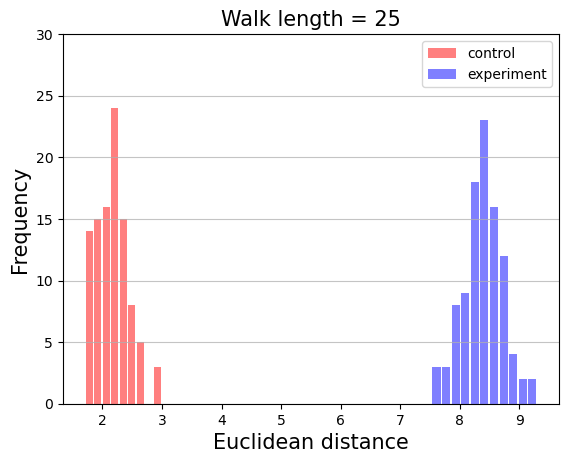

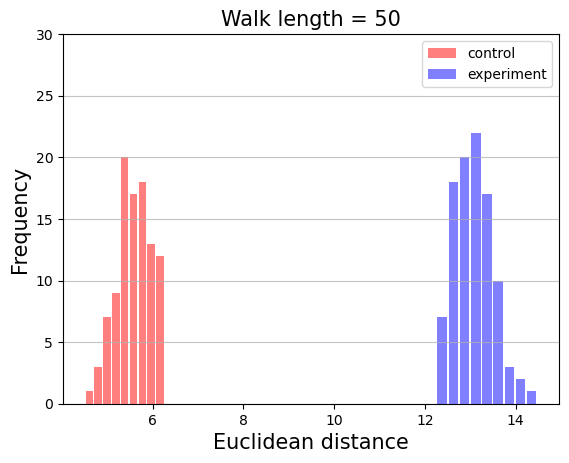

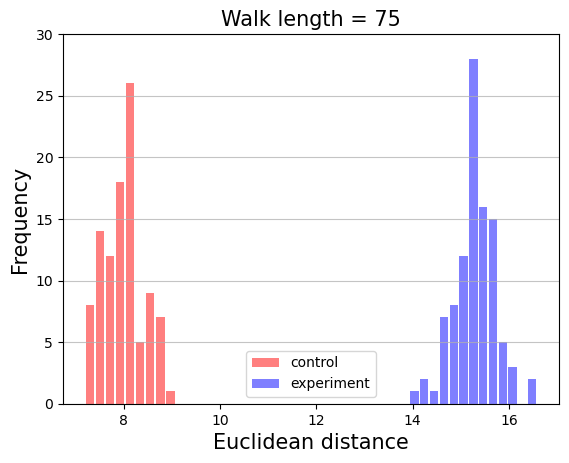

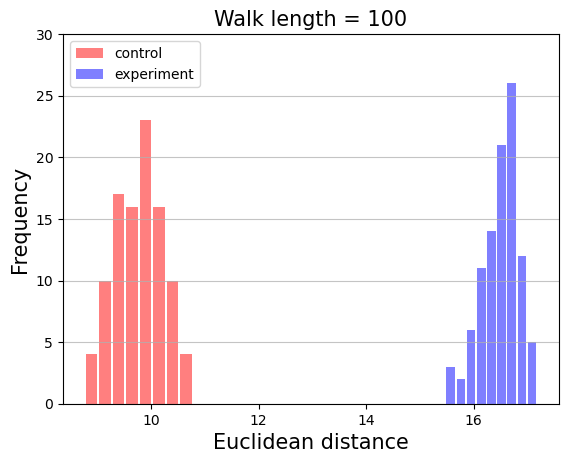

In [165]:
for i, walk_length in enumerate(list_length):
    
    dist_control = np.loadtxt(
        DATA_PATH + 
        f'distance_control_N{n_node}_M{n_missing}_D{dimensions}_L{walk_length}.dat')
    dist_exp = np.loadtxt(
        DATA_PATH + 
        f'distance_exp_N{n_node}_M{n_missing}_D{dimensions}_L{walk_length}.dat')
    
    
    fig, ax = plt.subplots()
    n, bins, patches = plt.hist(x = dist_control,
                            bins = 'auto', 
                            color = 'red',
                            alpha = 0.5, 
                            rwidth = 0.85,
                            label = 'control',
                            )

    n, bins, patches = plt.hist(x = dist_exp,
                                bins = 'auto', 
                                color = 'blue',
                                alpha = 0.5, 
                                rwidth = 0.85,
                                label = 'experiment',
                                )

    plt.grid(axis='y', alpha=0.75)
    plt.title(f'Walk length = {walk_length}', fontsize = 15)
    plt.xlabel('Euclidean distance', fontsize = 15)
    plt.ylabel('Frequency', fontsize = 15)
    plt.legend()
    maxfreq = n.max()
    plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
    plt.savefig(FIG_PATH +
                f'distance_N{n_node}_M{n_missing}_D{dimensions}_L{walk_length}.png', 
                format = 'png', 
                dpi = 300)
    
    plt.show()
    
    

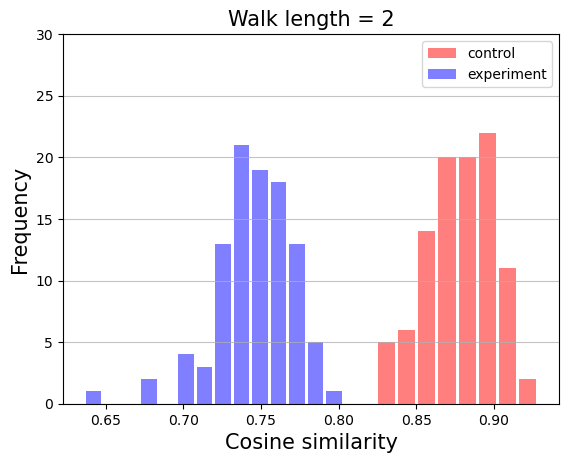

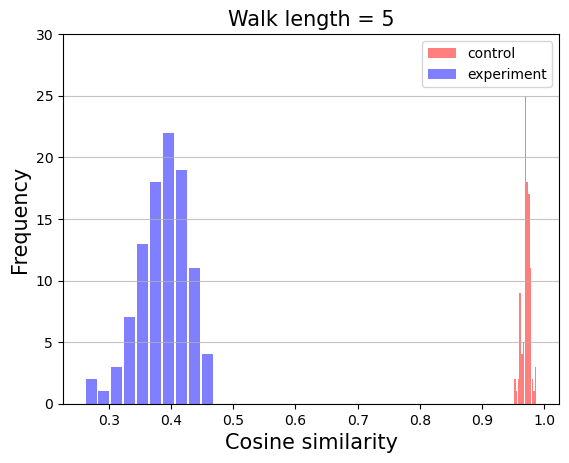

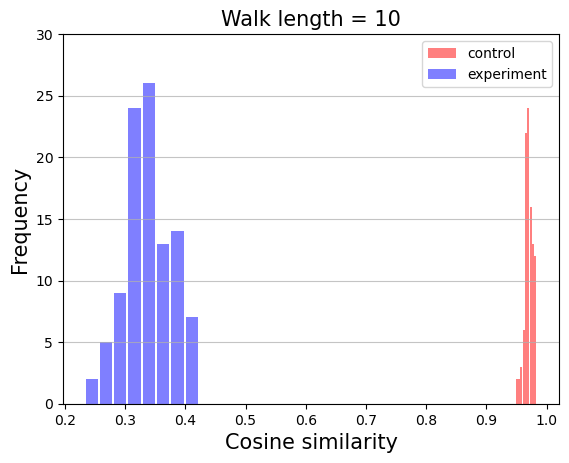

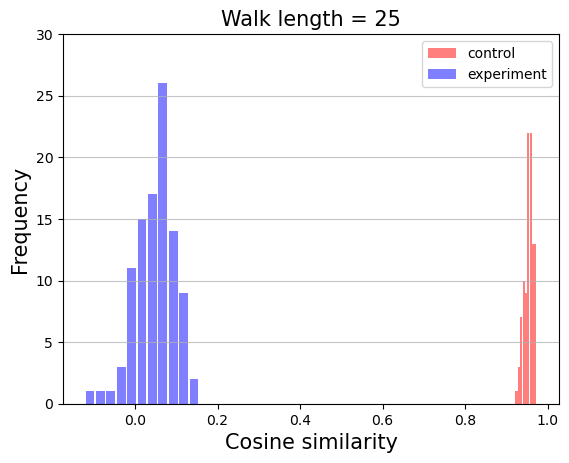

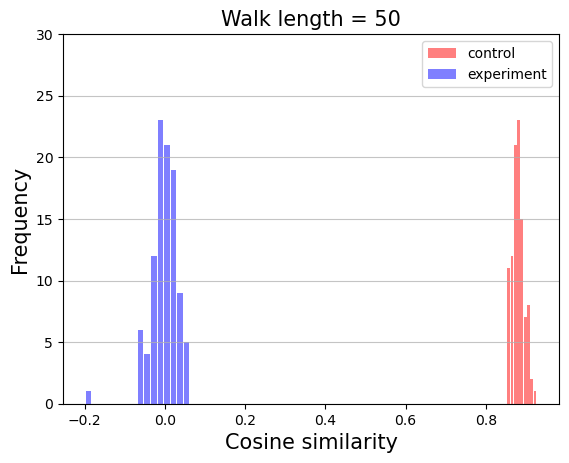

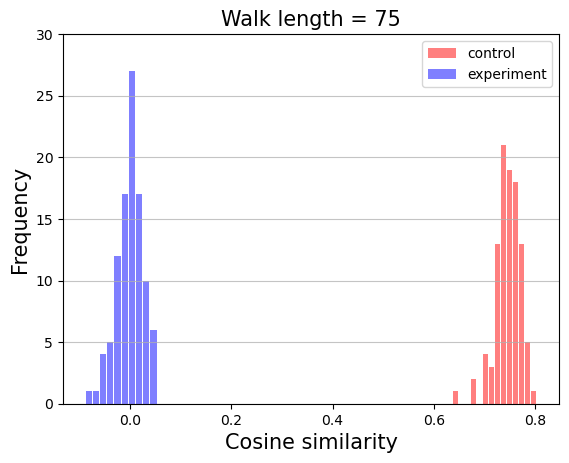

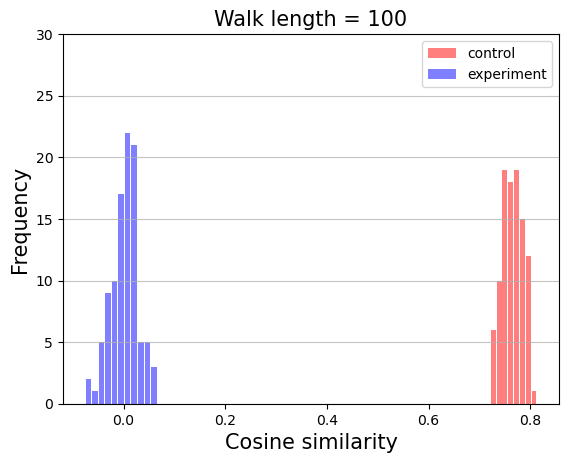

In [166]:
for i, walk_length in enumerate(list_length):
    
    cosim_control = np.loadtxt(
        DATA_PATH + 
        f'cosim_control_N{n_node}_M{n_missing}_D{dimensions}_L{walk_length}.dat')
    cosim_exp = np.loadtxt(
        DATA_PATH + 
        f'cosim_exp_N{n_node}_M{n_missing}_D{dimensions}_L{walk_length}.dat')
    
    
    fig, ax = plt.subplots()
    n, bins, patches = plt.hist(x = cosim_control,
                            bins = 'auto', 
                            color = 'red',
                            alpha = 0.5, 
                            rwidth = 0.85,
                            label = 'control',
                            )

    n, bins, patches = plt.hist(x = cosim_exp,
                                bins = 'auto', 
                                color = 'blue',
                                alpha = 0.5, 
                                rwidth = 0.85,
                                label = 'experiment',
                                )

    plt.grid(axis='y', alpha=0.75)
    plt.title(f'Walk length = {walk_length}', fontsize = 15)
    plt.xlabel('Cosine similarity', fontsize = 15)
    plt.ylabel('Frequency', fontsize = 15)
    plt.legend()
    maxfreq = n.max()
    plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
    plt.savefig(FIG_PATH +
                f'distance_N{n_node}_M{n_missing}_D{dimensions}_L{walk_length}.png', 
                format = 'png', 
                dpi = 300)
    
    plt.show()
    
    

In [148]:
avg_dist_control = []
std_dist_control = []
avg_dist_exp = []
std_dist_exp = []

avg_cosim_control = []
std_cosim_control = []
avg_cosim_exp = []
std_cosim_exp = []

for i, walk_length in enumerate(list_length):
    avg_dist_control.append(np.mean(dist_control_list[i]))
    avg_dist_exp.append(np.mean(dist_exp_list[i]))
    
    std_dist_control.append(np.std(dist_control_list[i]))
    std_dist_exp.append(np.std(dist_exp_list[i]))
    
    avg_cosim_control.append(np.mean(cosim_control_list[i]))
    avg_cosim_exp.append(np.mean(cosim_exp_list[i]))
    
    std_cosim_control.append(np.std(cosim_control_list[i]))
    std_cosim_exp.append(np.std(cosim_exp_list[i]))

[]

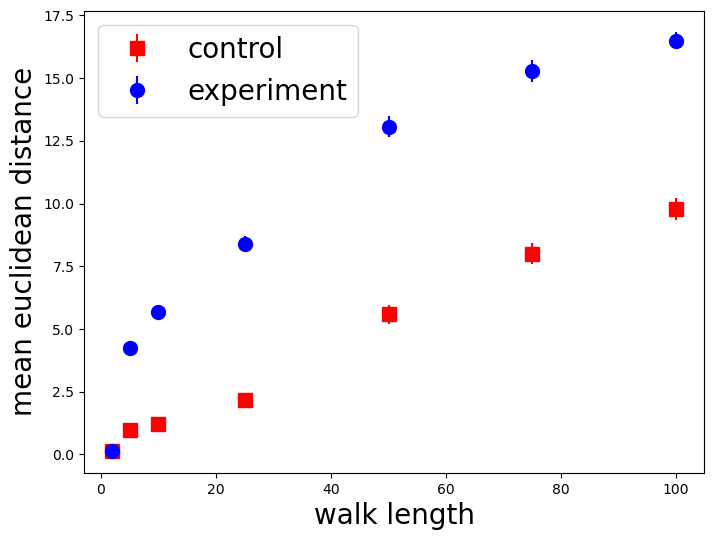

In [156]:
fig, ax = plt.subplots(figsize = (8, 6))
# ax1.errorbar(P_list, lwcc, 
#              yerr = std_lwcc, c = 'g', fmt = 's', label = '$WCC$', ms = 10)
ax.errorbar(list_length, avg_dist_control, yerr = std_dist_control,
           fmt = 's', c = 'r', label = 'control', ms = 10)

ax.errorbar(list_length, avg_dist_exp, yerr = std_dist_exp,
           fmt = 'o', c = 'b', label = 'experiment', ms = 10)

ax.set_xlabel('walk length', fontsize = 20)
ax.set_ylabel('mean euclidean distance', fontsize = 20)
ax.legend(fontsize = 20)
plt.savefig(FIG_PATH +
                f'mean_distance_N{n_node}_M{n_missing}_D{dimensions}.png', 
                format = 'png', 
                dpi = 300)
plt.plot()

[]

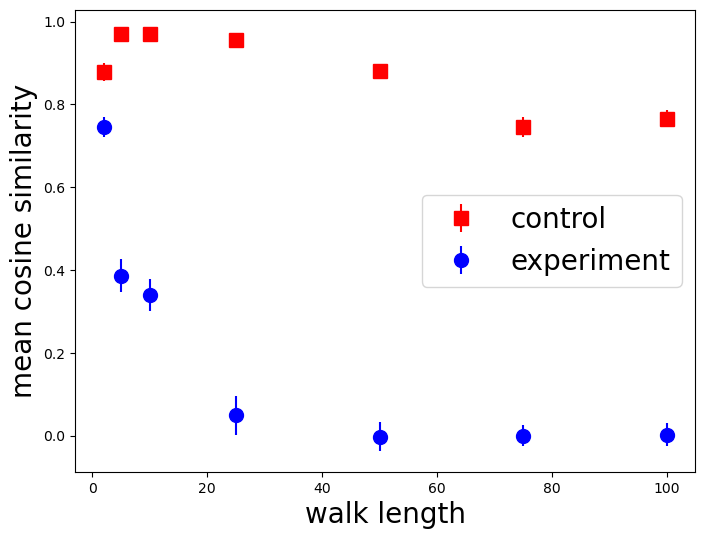

In [157]:
fig, ax = plt.subplots(figsize = (8, 6))
# ax1.errorbar(P_list, lwcc, 
#              yerr = std_lwcc, c = 'g', fmt = 's', label = '$WCC$', ms = 10)
ax.errorbar(list_length, avg_cosim_control, yerr = std_cosim_control,
           fmt = 's', c = 'r', label = 'control', ms = 10)

ax.errorbar(list_length, avg_cosim_exp, yerr = std_cosim_exp,
           fmt = 'o', c = 'b', label = 'experiment', ms = 10)

ax.set_xlabel('walk length', fontsize = 20)
ax.set_ylabel('mean cosine similarity', fontsize = 20)
ax.legend(fontsize = 20)
plt.savefig(FIG_PATH +
                f'mean_cosim_N{n_node}_M{n_missing}_D{dimensions}.png', 
                format = 'png', 
                dpi = 300)

plt.plot()